In [1]:
import sys

import matplotlib.pyplot as plt
import json

import dysts
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *

try:
    from private.lyap import corr_dim
except:
    from nolds import corr_dim


%load_ext autoreload
%autoreload 2

## Add a single dynamical system to the database

In [4]:
# We will make a local copy of the internal database
OUTPUT_FILE = "./chaotic_attractors2.json"
INPUT_FILE = "dysts/data/chaotic_attractors.json"
# INPUT_FILE = "./dysts/data/chaotic_attractors.json"
# INPUT_FILE = OUTPUT_FILE

with open(INPUT_FILE, "r") as file:
    data = json.load(file)
print(f"Total models being analyzed is {len(data.keys())}.")


for i, name in enumerate(get_attractor_list()):
#     if "dt" in data[name]:
#         continue
    
    if "Hyper" not in name:
        continue
        
    model = getattr(dysts.flows, name)()
    print(name)
    
    dt, period = compute_timestep(model, return_period=True)
    print(dt, period)

    data[name]["dt"] = dt
    data[name]["period"] = period
    # Save new file
    with open(OUTPUT_FILE, 'w') as f:
        json.dump(data, f, indent=4)    

Total models being analyzed is 131.
HyperBao
Completed step 0 of 20
Completed step 5 of 20
Completed step 10 of 20
Completed step 15 of 20
0.00030068702800142903 0.43736294982026047
HyperCai
Completed step 0 of 20
Completed step 5 of 20
Completed step 10 of 20
Completed step 15 of 20
0.0003654032174278714 0.45854521402713266
HyperJha
Completed step 0 of 20
Completed step 5 of 20
Completed step 10 of 20
Completed step 15 of 20
0.0003746954441920209 0.4282233647908811
HyperLorenz
Completed step 0 of 20
Completed step 5 of 20
Completed step 10 of 20
Completed step 15 of 20
0.00028984341439371934 0.4215904209363191
HyperLu
Completed step 0 of 20
Completed step 5 of 20
Completed step 10 of 20
Completed step 15 of 20
0.000315613385769233 0.4297714189198066
HyperPang
Completed step 0 of 20
Completed step 5 of 20
Completed step 10 of 20
Completed step 15 of 20
0.0003291356000406641 0.4388474667208855
HyperQi
Completed step 0 of 20
Completed step 5 of 20
Completed step 10 of 20
Completed step 1


period:  6.6038 



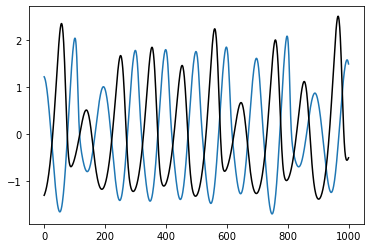

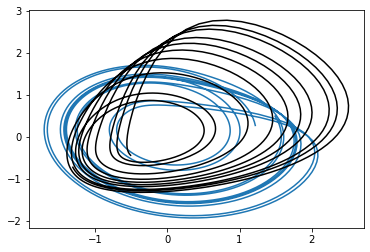

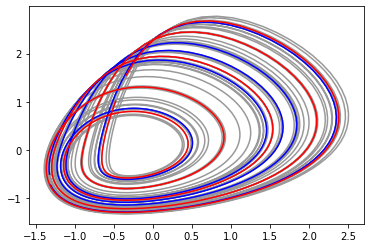

In [2]:
# Sanity check: plot a new system's trajectory. For single-modal attractors, there should be ~10 dominant peaks in interval

# Plot a reference trajectory as a sanity check
eq = Rossler()
sol0 = eq.make_trajectory(5000, resample=True, standardize=True)


eq = Blasius()
# eq.ic = np.array([-0.6861051 ,  1.71118483, -2.79294469,  0.55636579])
# eq.dt *= 10
# eq.r *= 0.8
# eq.ic = np.array([-0.08541919, -0.05204435,  1.34515262])
# eq.dt /= 10
# eq.period /= 6 / 10
# eq.period /= 2
# eq.period /= 20/10 * 8.5/10
# eq.dt = 0.01
# eq.period *= 5


sol = eq.make_trajectory(5000, resample=True, standardize=True, postprocess=True, pts_per_period=100)
# eq.ic = np.vstack([eq.ic, eq.ic])

plt.figure()
plt.plot(sol0[:1000, 0])
plt.plot(sol[:1000, 0], 'k')

plt.figure()
plt.plot(sol0[:1000, 0], sol0[:1000, 1])
plt.plot(sol[:1000, 0], sol[:1000, 1], 'k')

plt.figure()
plt.plot(sol[:, 0], sol[:, 1], color=(0.6, 0.6, 0.6))
plt.plot(sol[:500, 0], sol[:500, 1], "b")
plt.plot(sol[-500:, 0], sol[-500:, 1], "r")

print("\nperiod: ", eq.period, "\n")

# Find dynamical properties of each system

In [83]:
# We will make a local copy of the internal database
OUTPUT_FILE = "./chaotic_attractors2.json"
INPUT_FILE = "dysts/data/chaotic_attractors.json"
# INPUT_FILE = "./dysts/data/chaotic_attractors.json"
# INPUT_FILE = OUTPUT_FILE
RECALCULATE = True

points_to_sample = 10 # number of initial conditions to sample when computing values

with open(INPUT_FILE, "r") as file:
    data = json.load(file)
print(f"Total models being analyzed is {len(data.keys())}.")


for i, item in enumerate(get_attractor_list()):
    if "Hyper" in item:
        continue
    if "Delay" in item:
        continue
    
    
    model = getattr(dysts.flows, item)()

    
#     if not hasattr(model, "_postprocessing"):
#         continue
        
#     if item in ["ArnoldBeltramiChildress", "ArnoldWeb", "BickleyJet", "BlinkingVortex", "BlinkingRotlet", "CircadianRhythm",
#                 "ForcedBrusselator", "DoubleGyre", "DoublePendulum", "Duffing", "FluidTrampoline", "ForcedBrusselator", "ForcedVanDerPol",
#                "ForcedFitzHughNagumo", "OscillatingFlow", "StickSlipOscillator", "TurchinHanski"]:
#         continue

    if hasattr(model, "_postprocessing"):
        continue
    if item in ["MackeyGlass", "PiecewiseCircuit", "ArnoldBeltramiChildress", "ArnoldWeb", "BickleyJet", "BlinkingVortex", "BlinkingRotlet", "CircadianRhythm", "ForcedFitzHughNagumo",
            "ForcedBrusselator", "DoubleGyre", "DoublePendulum", "Duffing", "FluidTrampoline", "ForcedBrusselator", "ForcedVanDerPol", "PiecewiseCircuit",
           "ForcedFitzHughNagumo", "OscillatingFlow", "StickSlipOscillator", "TurchinHanski", "SprottMore", "SwingingAtwood", "NuclearQuadrupole"]:
        continue
    

    print(str(i), item, ": ", end="")
    current_fields = list(data.keys())
    
#     check_set = {"maximum_lyapunov_estimated", "lyapunov_spectrum", "correlation_dimension"}
#     if check_set.intersection(set(current_keys)) == check_set and not RECALCULATE:
#         print("All fields already filled; skipping calculation.")
#         continue
    
    model.dt /= 10
    sample_pts = sample_initial_conditions(model, points_to_sample)
    #print("Finished selecting initial points on attractor.")
    pts_per_trajectory = 15000 # number of timesteps to use to find the jacobian
    
#     try:

    all_estimates_lyap = list()
    all_estimates_corrdim = list()
    all_estimates_kydim = list()
    for j, sample_pt in enumerate(sample_pts):
        print(".", end="")
        model = getattr(dysts.flows, item)()
#         model.dt /= 10
        model.ic = sample_pt
        
        lyapval = find_lyapunov_exponents(model, pts_per_trajectory, pts_per_period=500)
        all_estimates_lyap.append(lyapval)

        sol = model.make_trajectory(10000, resample=True, pts_per_period=100)
        try:
            all_estimates_corrdim.append(corr_dim(sol))
            all_estimates_kydim.append(kaplan_yorke_dimension(lyapval))
        except:
            print("Bad starting point; ignoring this")
            pass

    lyap = np.median(np.array(all_estimates_lyap), axis=0)
    cdim = np.median(all_estimates_corrdim)
    kydim = np.median(all_estimates_kydim)

    # lyap_minmag = np.min(np,abs(lyap))
    # dissipation = np.sum(lyap)

    # if dissipation > 0.0:
    # if lyap_minmag < 1e-3: 

    if "maximum_lyapunov_estimated" not in data[item] or RECALCULATE:
        data[item]["maximum_lyapunov_estimated"] = np.max(lyap)
        print(f"lyap: {np.max(lyap)} ", end="")

    if "lyapunov_spectrum_estimated" not in data[item] or RECALCULATE:
        data[item]["lyapunov_spectrum_estimated"] = list(lyap)
        print(f"spectrum: {lyap} ", end="")

    if "kaplan_yorke_dimension" not in data[item] or RECALCULATE:
        data[item]["kaplan_yorke_dimension"] = kydim
        print(f"kydim: {kydim} ", end="")

    if "correlation_dimension" not in data[item] or RECALCULATE:
        data[item]["correlation_dimension"] = cdim
        print(f"corr_dim: {cdim} ", end="")

#     if "permutation_entropy" not in data[item] or RECALCULATE:
    print("\n")




    # Save new file
    with open(OUTPUT_FILE, 'w') as f:
        json.dump(data, f, indent=4)

#     except:
#         print(f"Skipped {item}")
#         continue

print("Completed.")



Total models being analyzed is 131.
0 Aizawa : ..........lyap: 0.11468392427822449 spectrum: [ 0.11468392  0.04101806 -0.33985438] kydim: 2.4517188438665958 corr_dim: 1.9717048016764243 

1 AnishchenkoAstakhov : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2923.9615516649505
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.05465001716232629 spectrum: [ 0.05465002  0.00278856 -0.45225785] kydim: 2.122609676273513 corr_dim: 1.9860933485876138 

2 Arneodo : ..........lyap: 0.27186704186725563 spectrum: [ 0.27186704 -0.00338844 -1.22944621] kydim: 2.2071600135682297 corr_dim: 1.9131408387471067 

5 BeerRNN : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 8333.562806920923
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.016639835066133854 spectrum: [ 0.01663984 -0.00058567 -0.53150137] kydim: 2.0306864786018775 corr_dim: 1.4356949270551964 

6 BelousovZhabotinsky : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 15872.891671013738
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")
/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)


..

/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)


.

/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)


.

/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)


.

/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)


.

/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)


.

/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)


.

/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)


.

/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)


.

/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)


lyap: 107.42813600667483 spectrum: [  107.42813601    -6.96646115 -5902.02343449] kydim: 2.0173110425567797 corr_dim: 0.8567434473255703 

8 Blasius : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1572.3333333333335
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.05006568740879614 spectrum: [ 0.05006569  0.00905826 -2.94722017] kydim: 2.0203118386321486 corr_dim: 1.6856818574461006 

11 Bouali : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2283.1081081081084
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.06747909843969056 spectrum: [ 0.0674791  -0.02099741 -0.18016344] kydim: 2.343238159308096 corr_dim: 1.7207991399766793 

12 Bouali2 : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2164.4843194309738
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


..

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2222.2127659574467
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


lyap: 0.03429345733987108 spectrum: [ 0.03429346  0.01467071 -0.00966817] kydim: 5.089627283463573 corr_dim: 1.9191671585171575 

13 BurkeShaw : ..........lyap: 2.412906054139599 spectrum: [  2.41290605   0.20342222 -11.47591006] kydim: 2.2285560267954843 corr_dim: 2.072252862376316 

14 CaTwoPlus : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2924.0148051382535
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.4398934161121314 spectrum: [ 0.43989342  0.06399088 -9.19665797] kydim: 2.0536582709172286 corr_dim: 1.2242154077421163 

15 CaTwoPlusQuasiperiodic : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2923.9750445632794
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


..

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


..

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1618.1329539166863
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


lyap: 0.1387958178780994 spectrum: [ 0.13879582  0.07060744 -0.15243536] kydim: 3.8636716295947604 corr_dim: 1.8497553030749776 

16 CellCycle : ..........lyap: 0.004543460121794124 spectrum: [ 4.54346012e-03 -3.96080372e-04 -2.07790225e-01 -4.27981138e-01
 -2.82231894e+00 -6.74044917e+00] kydim: 2.020556544556026 corr_dim: 1.7412932046469747 

17 CellularNeuralNetwork : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1474.926253687316
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.1975148218042097 spectrum: [ 0.19751482 -0.05306987 -0.61256286] kydim: 2.206204139821723 corr_dim: 1.793363600770936 

18 Chen : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1618.1141439205958
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 2.1335702205605402 spectrum: [  2.13357022   0.21168333 -12.15475037] kydim: 2.189980234697357 corr_dim: 2.0942788770234975 

19 ChenLee : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 4761.929020207167
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.176639276504556 spectrum: [ 0.17663928  0.04789646 -5.5516528 ] kydim: 2.04144186095621 corr_dim: 1.2291916081637395 

20 Chua : ..........lyap: 0.45106721086454665 spectrum: [ 0.45106721  0.04771985 -4.27346886] kydim: 2.1145443800891766 corr_dim: 1.8406533289378875 

22 CoevolvingPredatorPrey : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 5050.392858612036
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.0042255029022343436 spectrum: [ 0.0042255   0.00245333 -1.97160498] kydim: 2.0033310722187743 corr_dim: 1.4387195470858136 

23 Colpitts : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 3086.4251102914586
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.1266369140273331 spectrum: [ 0.12663691 -0.02608446 -0.97937098] kydim: 2.1156754604002463 corr_dim: 1.7321555806075333 

24 Coullet : ..........lyap: 0.14387574780254334 spectrum: [ 0.14387575 -0.0116796  -0.56713294] kydim: 2.2267847308799515 corr_dim: 2.043399335550397 

25 Dadras : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 7575.673807878371
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.45898109590190855 spectrum: [  0.4589811    0.04060966 -11.18696673] kydim: 2.04529322919326 corr_dim: 1.776460365573121 

26 DequanLi : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1075.2630228380808
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


....

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.....

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.lyap: 0.8387456324656324 spectrum: [ 0.83874563  0.00592185 -3.34423929] kydim: 2.4087566349582783 corr_dim: 2.046511143799855 

30 ExcitableCell : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 4166.666666666666
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 4.394939951399914 spectrum: [  4.39493995  -0.41578946 -33.16626355] kydim: 2.121639429656314 corr_dim: 0.1894317318105157 

31 Finance : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 3787.885749291677
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.11023076025782412 spectrum: [ 0.11023076  0.01301562 -0.63187741] kydim: 2.1923341343367744 corr_dim: 1.917210104396962 

36 GenesioTesi : ..........lyap: 0.11404321717096778 spectrum: [ 0.11404322  0.00090261 -0.54653461] kydim: 2.2167107883626533 corr_dim: 1.986255689981805 

37 GuckenheimerHolmes : ......

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


....lyap: 0.4799062388267902 spectrum: [ 0.47990624  0.12176405 -0.93024073] kydim: 2.7145966269453337 corr_dim: 2.062860717843848 

38 Hadley : ..........lyap: 0.28396210574821656 spectrum: [ 0.28396211 -0.03866527 -0.43608832] kydim: 2.5357160630568876 corr_dim: 2.061208124263907 

39 Halvorsen : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2314.8320895522384
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.7632787557248966 spectrum: [ 0.76327876 -0.21043715 -4.69253625] kydim: 2.118808223145618 corr_dim: 1.8998241704633192 

40 HastingsPowell : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 6944.572866902965
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.008622469305432777 spectrum: [ 0.00862247  0.00574987 -0.51854958] kydim: 2.027660724112963 corr_dim: 1.0150171606858593 

41 HenonHeiles : .

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 7246.556644745006
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


lyap: 0.022981434740562523 spectrum: [ 0.02298143  0.01244769  0.00026381 -0.01003445] kydim: 6.537839123220101 corr_dim: 1.4716174307930618 

42 HindmarshRose : ..........lyap: 0.28159344425394045 spectrum: [ 2.81593444e-01  6.39025454e-03 -7.03197283e+00] kydim: 2.0499472808911197 corr_dim: 1.6468409811526064 

43 Hopfield : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 3205.0147492625374
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.08227018241459015 spectrum: [ 0.08227018  0.00367596 -0.27962858 -0.3765237  -0.41290312 -1.43842495] kydim: 2.2677913192232495 corr_dim: 2.0130053895569664 

57 IsothermalChemical : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2732.981550091688
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.46152589148219963 spectrum: [ 0.46152589 -0.23470154 -7.38796996] kydim: 2.034341661393785 corr_dim: 1.0899437284121607 

58 ItikBanksTumor : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 6666.666666666667
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.02176420362319617 spectrum: [ 0.0217642  -0.01552267 -0.55527048] kydim: 2.009157247122884 corr_dim: 1.0078949844455365 

59 JerkCircuit : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 8658.032932799288
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.40171299105200364 spectrum: [ 0.40171299  0.18811442 -1.14763886] kydim: 2.5114713610117443 corr_dim: 1.7893225572318991 

60 KawczynskiStrizhak : ..........lyap: 0.025862499562663073 spectrum: [ 0.0258625  -0.07149986 -0.31509578] kydim: 1.4092145947947747 corr_dim: 0.5074333181999937 

61 Laser : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 3703.716744913929
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.926379775977096 spectrum: [  0.92637978  -0.13964657 -15.91786435] kydim: 2.049680633465388 corr_dim: 1.7190779289218372 

62 LiuChen : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 18018.431108114186
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


......

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


....lyap: 0.26689960214404507 spectrum: [  0.2668996   -1.07333937 -18.75442411] kydim: 1.2538282866824686 corr_dim: 1.064075374500539 

63 Lorenz : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2777.716083657228
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 1.016992106373554 spectrum: [  1.01699211   0.09560443 -14.88772572] kydim: 2.074079887088261 corr_dim: 1.9905597638856043 

64 Lorenz84 : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 5747.107438016529
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 1.1143992546093684 spectrum: [ 1.11439925 -0.12780222 -2.36174781] kydim: 2.414032487708553 corr_dim: 1.8589294769114586 

65 Lorenz96 : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 5128.151260504202
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 1.4301889845590217 spectrum: [ 1.43018898  0.30081057 -1.22560048 -3.43076009] kydim: 3.146918832536465 corr_dim: 2.3145935552616836 

66 LorenzBounded : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1754.4128933231007
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.7655166893705379 spectrum: [ 7.65516689e-01 -8.30584613e-03 -1.16732126e+01] kydim: 2.067485624673264 corr_dim: 1.9688723768350849 

67 LorenzCoupled : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 3002.964609968501
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 1.1943411192753137 spectrum: [  1.19434112   0.18933706  -1.16436398  -2.01600254 -13.65771137
 -15.09374971] kydim: 3.103467747520539 corr_dim: 2.4036487878547987 

68 LorenzStenflo : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2070.4661477947943
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.4460185775982798 spectrum: [ 0.44601858  0.04787352 -2.73028202 -3.44976291] kydim: 2.1798101764256588 corr_dim: 2.1376654700693614 

69 LuChen : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 6410.361842105263
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.613748917344614 spectrum: [  0.61374892   0.24823554 -22.62530347] kydim: 2.0380483396973386 corr_dim: 1.3774753272936289 

70 LuChenCheng : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2777.7677496991582
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.24498370490729332 spectrum: [  0.2449837    0.08329665 -11.53579523] kydim: 2.0281718690985517 corr_dim: 1.7022072937057722 

71 MacArthur : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 3300.334549878346
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.16305415948641122 spectrum: [ 1.63054159e-01  1.17616638e-02 -3.48462191e-02 -1.46022517e-01
 -2.51491544e-01 -2.51965251e-01 -2.52566062e-01 -2.52862350e-01
 -2.54163888e-01 -1.43323159e+01] kydim: 3.9622939320684436 corr_dim: 2.384095841038369 

73 MooreSpiegel : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2688.151856487276
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.4118068385010778 spectrum: [ 0.41180684 -0.06557108 -1.15762215] kydim: 2.298113662933388 corr_dim: 1.7523055520903814 

74 MultiChua : ..........lyap: 0.2181357700040823 spectrum: [ 0.21813577  0.01529034 -2.99895316] kydim: 2.0811690330352763 corr_dim: 1.606914806025376 

75 NewtonLiepnik : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2873.56904062405
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.15022603362181444 spectrum: [ 0.15022603  0.02830035 -0.78714755] kydim: 2.2294194320222847 corr_dim: 1.9742093892845003 

76 NoseHoover : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1984.1398667613544
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


lyap: 0.043429618629434175 spectrum: [ 0.04342962  0.02349326 -0.02441014] kydim: 4.729234860142638 corr_dim: 1.9631612871325728 

79 PanXuZhou : ..........lyap: 0.733482152526236 spectrum: [  0.73348215   0.0438582  -13.60399136] kydim: 2.0554734660688965 corr_dim: 1.9004143357675616 

80 PehlivanWei : ..........lyap: 0.11045272900840396 spectrum: [ 0.11045273 -0.03380042 -0.59737979] kydim: 2.1133651043625177 corr_dim: 1.793414249831702 

82 Qi : ..........lyap: 1.8068316212673512 spectrum: [  1.80683162   0.5436494   -4.36825197 -44.47430875] kydim: 2.527057397724626 corr_dim: 1.8940373473447132 

83 QiChen : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 3144.6344008347382
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 4.017691681564735 spectrum: [  4.01769168   0.46419958 -44.35508189] kydim: 2.102510638028074 corr_dim: 1.873369782915053 

84 RabinovichFabrikant : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1543.1780640898583
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.21794784998541988 spectrum: [ 0.21794785 -0.00089278 -0.65687007] kydim: 2.344787840321537 corr_dim: 2.034143325220048 

85 RayleighBenard : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2732.234105763517
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 1.8300719662202463 spectrum: [  1.83007197   0.48902671 -19.2954039 ] kydim: 2.1175042858174784 corr_dim: 1.9896130763869881 

86 RikitakeDynamo : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2777.777777777778
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.13803667272123038 spectrum: [ 1.38036673e-01  3.25336226e-04 -2.15526161e+00] kydim: 2.064568021534762 corr_dim: 1.9363434907048738 

87 Rossler : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2604.1694213054784
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.0685223824404672 spectrum: [ 0.06852238  0.02841852 -5.76558007] kydim: 2.016159103266072 corr_dim: 1.7281954283619687 

88 Rucklidge : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2732.226421886249
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.18923281891961585 spectrum: [ 0.18923282  0.03001029 -3.25667156] kydim: 2.0675586864973705 corr_dim: 1.8984618238913733 

89 Sakarya : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 3703.6706791499482
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.30476669511148585 spectrum: [ 0.3047667   0.04706276 -1.28886117] kydim: 2.2663142935834766 corr_dim: 2.0419982079036165 

90 SaltonSea : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1182.0381231671554
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.44518560826474196 spectrum: [ 0.44518561  0.02602782 -4.678178  ] kydim: 2.0979368074025633 corr_dim: 1.7528177750283784 

91 SanUmSrisuchinwong : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1282.0539240941096
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.22834009265639088 spectrum: [ 0.22834009  0.01530074 -1.23883506] kydim: 2.1996711801882927 corr_dim: 2.0674980455260537 

93 ShimizuMorioka : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1811.587659894658
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.0401904687173968 spectrum: [ 0.04019047  0.0039606  -1.41035417] kydim: 2.0315571818464067 corr_dim: 1.6976476012267865 

94 SprottA : .

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 4536.742150980358
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


lyap: 0.026375841526423093 spectrum: [ 0.02637584  0.01215396 -0.00555485] kydim: 7.561647461898436 corr_dim: 1.9742444438201123 

95 SprottB : ..........lyap: 0.2240370592414272 spectrum: [ 0.22403706  0.01946077 -1.23044735] kydim: 2.195712524339404 corr_dim: 2.064304807409677 

96 SprottC : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2732.226322263223
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.1803401168019924 spectrum: [ 0.18034012  0.00778416 -1.17597269] kydim: 2.161688940022674 corr_dim: 1.916285613086138 

97 SprottD : ..........lyap: 0.08189495584930204 spectrum: [ 0.08189496  0.00676728 -1.29994469] kydim: 2.067858856646991 corr_dim: 1.9598934577437266 

99 SprottE : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2976.120800655508
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.10359402857858058 spectrum: [ 1.03594029e-01 -5.47666151e-04 -1.10372976e+00] kydim: 2.0941882403840655 corr_dim: 1.5331262575223452 

100 SprottF : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 3875.9315206445117
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.12552813995705447 spectrum: [ 0.12552814  0.02885784 -0.60210562] kydim: 2.2511228758216264 corr_dim: 2.248950661699668 

101 SprottG : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1344.0895061728395
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.04034078062552115 spectrum: [ 0.04034078  0.00483378 -0.63098727] kydim: 2.0713186302953543 corr_dim: 1.436681429890026 

102 SprottH : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 4762.005649717515
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.12059084856448071 spectrum: [ 0.12059085  0.03091122 -0.59646944] kydim: 2.252156277471384 corr_dim: 2.2146132592282646 

103 SprottI : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1173.7542955326462
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.016967009889564996 spectrum: [ 1.69670099e-02  6.21612893e-04 -1.02734201e+00] kydim: 2.0199947667280105 corr_dim: 1.5872029586513505 

104 SprottJ : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1333.3333333333335
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.04282156228295154 spectrum: [ 0.04282156  0.00534734 -2.05910899] kydim: 2.0238040067270786 corr_dim: 1.7813776562297718 

105 SprottJerk : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1650.1937984496124
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.05560486639516013 spectrum: [ 0.05560487  0.0112211  -2.13531828] kydim: 2.0313325808200817 corr_dim: 1.1460123690031176 

106 SprottK : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1984.1404701217784
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.04281472536380626 spectrum: [ 0.04281473 -0.01349783 -0.88049514] kydim: 2.0326186188088657 corr_dim: 1.830543461331808 

107 SprottL : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2645.5063913470995
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.03520195532700283 spectrum: [ 3.52019553e-02  8.29107678e-04 -1.01358389e+00] kydim: 2.0342044086185505 corr_dim: 1.405846178350737 

108 SprottM : ..........lyap: 0.059015558763315996 spectrum: [ 0.05901556 -0.00349135 -1.03732378] kydim: 2.048380023999223 corr_dim: 1.564456312839193 

110 SprottN : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1322.7535037098105
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.05494910053601794 spectrum: [ 0.0549491   0.00376849 -2.07087933] kydim: 2.0293478308213406 corr_dim: 1.780931092561905 

111 SprottO : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1666.666666666667
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.06655658343192339 spectrum: [ 0.06655658  0.01221449 -0.31647636] kydim: 2.2490082879042737 corr_dim: 1.6697115983566726 

112 SprottP : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1149.4297396169572
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.11073431387588253 spectrum: [ 0.11073431  0.01029238 -0.49326258] kydim: 2.2469585539565724 corr_dim: 2.058639773439663 

113 SprottQ : ..........lyap: 0.13508646016434006 spectrum: [ 0.13508646  0.00466665 -0.61621857] kydim: 2.2274985162834637 corr_dim: 1.8569377917107737 

114 SprottR : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1474.9316508937961
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.07968992074841667 spectrum: [ 0.07968992  0.00427866 -1.08368168] kydim: 2.076270240661735 corr_dim: 1.8289077518284587 

115 SprottS : ..........lyap: 0.18967535060346036 spectrum: [ 0.18967535  0.01672083 -1.18835016] kydim: 2.1781973770686083 corr_dim: 1.9187410465195636 

116 SprottTorus : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 7246.631517281781
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.2633567221117143 spectrum: [ 0.26335672 -0.04939983 -0.41951155] kydim: 2.5028897860525756 corr_dim: 1.068896618766853 

119 Thomas : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 5747.166319685404
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.8189253759437483 spectrum: [ 0.81892538  0.13227812 -6.5495766 ] kydim: 2.1442455455631126 corr_dim: 1.580526392479563 

120 ThomasLabyrinth : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 5747.126436781609
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 1.3714613724823088 spectrum: [ 1.37146137  0.04621484 -2.91329149] kydim: 2.4847867064242957 corr_dim: 2.2204238915359618 

121 Torus : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 5555.555555555556
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:155: RuntimeWarning: invalid value encountered in double_scalars
  dky = 1 + j + cspec[j] / np.abs(spectrum[j + 1])


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:155: RuntimeWarning: invalid value encountered in double_scalars
  dky = 1 + j + cspec[j] / np.abs(spectrum[j + 1])


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:155: RuntimeWarning: invalid value encountered in double_scalars
  dky = 1 + j + cspec[j] / np.abs(spectrum[j + 1])


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:155: RuntimeWarning: invalid value encountered in double_scalars
  dky = 1 + j + cspec[j] / np.abs(spectrum[j + 1])


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:155: RuntimeWarning: invalid value encountered in double_scalars
  dky = 1 + j + cspec[j] / np.abs(spectrum[j + 1])


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:155: RuntimeWarning: invalid value encountered in double_scalars
  dky = 1 + j + cspec[j] / np.abs(spectrum[j + 1])


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:155: RuntimeWarning: invalid value encountered in double_scalars
  dky = 1 + j + cspec[j] / np.abs(spectrum[j + 1])


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:155: RuntimeWarning: invalid value encountered in double_scalars
  dky = 1 + j + cspec[j] / np.abs(spectrum[j + 1])


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:155: RuntimeWarning: invalid value encountered in double_scalars
  dky = 1 + j + cspec[j] / np.abs(spectrum[j + 1])


.

/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:154: UserWarning: Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.
  warnings.warn("Cumulative sum of Lyapunov exponents never crosses zero. System may be ill-posed or undersampled.")
/Users/williamgilpin/program_repos/dysts/dysts/analysis.py:155: RuntimeWarning: invalid value encountered in double_scalars
  dky = 1 + j + cspec[j] / np.abs(spectrum[j + 1])
/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2923.9498644986456
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


lyap: 0.0 spectrum: [0. 0. 0.] kydim: nan corr_dim: 1.046936576974867 

122 Tsucs2 : ..........lyap: 0.7216628272585501 spectrum: [ 0.72166283 -0.32380143 -1.09265035] kydim: 2.343429744048496 corr_dim: 1.4548559260946927 

124 VallisElNino : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 2415.463692038495
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.6271778433056046 spectrum: [ 0.62717784  0.06821338 -5.64592902] kydim: 2.1223674123653042 corr_dim: 1.3173798160325667 

126 WangSun : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 6944.358578052551
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.08214538088762345 spectrum: [ 0.08214538 -0.00743948 -1.31909799] kydim: 2.055629273655145 corr_dim: 1.7487733112868236 

127 WindmiReduced : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1650.176553672317
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.14366454422587097 spectrum: [ 0.14366454  0.00300387 -1.60054512] kydim: 2.0859330282766297 corr_dim: 0.9753270937278067 

128 YuWang : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 4901.8960648402835
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 2.4007035039178533 spectrum: [  2.4007035   -0.18902148 -13.93277622] kydim: 2.165528440202843 corr_dim: 1.8519254222900599 

129 YuWang2 : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 1225.499375780275
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.8004715922970711 spectrum: [  0.80047159  -0.03384419 -13.09398839] kydim: 2.062482758067868 corr_dim: 1.5210735884870252 

130 ZhouChen : 

/Users/williamgilpin/program_repos/dysts/dysts/base.py:148: UserWarning: Expect slowdown due to excessive integration required; scale factor 5952.39066857104
  if upscale_factor > 1e3: warnings.warn(f"Expect slowdown due to excessive integration required; scale factor {upscale_factor}")


..........lyap: 0.7855541770357781 spectrum: [  0.78555418   0.09896952 -11.87975176] kydim: 2.0758728910823505 corr_dim: 1.740922189491188 

Completed.


## Check for database issues

In [ ]:
FILE1 = "./chaotic_attractors.json"
FILE2 = "./6_6_chaotic_attractors.json"

with open(FILE1, "r") as file:
    data1 = json.load(file)
with open(FILE2, "r") as file:
    data2 = json.load(file)
    
keyval = "maximum_lyapunov_estimated"
# keyval = "correlation_dimension"
# keyval = "kaplan_yorke_dimension"
for name in np.sort(list(data1.keys())):
    
    try:
        val1 = data1[name][keyval]
        val2 = data2[name][keyval]
    except:
        print("failed: ", name)
        
    try:
        pcent = np.abs((val1 - val2) / val1)
#         pcent = np.abs(np.sign(val1) - np.sign(val2))
        if np.abs(pcent) > 0.12:
            print(name, pcent)
    except:
        print("failed2: ", name)